In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np

fname = "https://raw.githubusercontent.com/CoffeaTeam/coffea/master/tests/samples/nano_dy.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()

/cvmfs/sft-nightlies.cern.ch/lcg/views/devswan/Sat/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(


In [2]:
from coffea.analysis_tools import PackedSelection

In [3]:
selections = PackedSelection(dtype='uint64')

selections.add("leadingelectronpt>10",ak.pad_none(events.Electron,1).pt[:,0] > 10)
selections.add("leadingjetpt>20",events.Jet[:,0].pt > 20)
selections.add("leadingjetpt>30",events.Jet[:,0].pt > 30)
selections.add("leadingjetpt>40",events.Jet[:,0].pt > 40)

In [15]:
def cutflow(hi,events,selections,cumulative=True):
    hi = hist.Hist(axes=[hist.Cat("selection", "selection"),
                    hist.Bin("x", "x coordinate [m]", 80, 0, 80)
                   ],
              label="Cutflow",
             )
    #if cumulative: print(f'cumulative')
    sels=[]
    cutflow=[]
    ne=[]
    cutflow.append(len(events))
    ne.append(np.ones(len(events)))
    names=["all"]
    for ss,n in enumerate(selections.names):
        len(events)
        if cumulative: sels.append(n)
        else: sels=[n]
        cutflow.append(np.count_nonzero(selections.all(*sels)))
        ne.append(np.ones(np.count_nonzero(selections.all(*sels)))*(ss+2))        
        #cutflow.append(selections.all(*sels))
    for namesi,ci,ei in zip(names+selections.names,cutflow,ne):
        hi.fill(selection=namesi,x=ei)
    return hi
        #print(f'{n} : {np.count_nonzero(selections.all(*sels))}')

In [11]:
from coffea import hist

In [16]:
hi=cutflow(hi,events,selections,cumulative=True)

In [17]:
hip=hi.project('selection')

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'all'),
  Text(1.5, 0, 'leadingelectronpt>10'),
  Text(2.5, 0, 'leadingjetpt>20'),
  Text(3.5, 0, 'leadingjetpt>30'),
  Text(4.5, 0, 'leadingjetpt>40')])

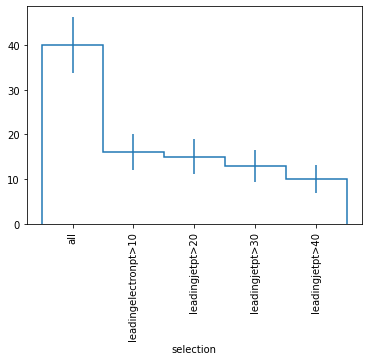

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
hip.to_hist().plot(ax=ax)
plt.xticks(rotation=90)